In [ ]:
from fastai.vision import *
from fastai import *

from fastai.metrics import error_rate

In [ ]:
#setting up our enviroment
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
!unzip train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/8299bf72b460c2aa31b2638575f02d15.jpg  
  inflating: train/82d567c499ecaa91b6c2e770133a9b60.jpg  
  inflating: train/83783023acd84a1677b03ab37161d536.jpg  
  inflating: train/83a1badbbcb371fca0e1ab375ee38482.jpg  
  inflating: train/83a2fd5b6da24250c9d36929b92d8682.jpg  
  inflating: train/84d2c6a359eb54ccaf9343fc0751bb57.jpg  
  inflating: train/84e1dd237e748239096c1236206f4e4e.jpg  
  inflating: train/84e7b6b591daef3d2b3b3a1ee6eb172f.jpg  
  inflating: train/84eafaa6b8fe268471959b0fc2b54e5d.jpg  
  inflating: train/85109cfaadc701bb8200f883de99f569.jpg  
  inflating: train/8548824a57e5f3f41f95166e46a94638.jpg  
  inflating: train/855b813539adbea4d30f693990377f29.jpg  
  inflating: train/857a8140c9dd3f7988c1d42bacce2c04.jpg  
  inflating: train/86597916cc0e563d4345b5d619f9d32a.jpg  
  inflating: train/865d921187cebbf5b25d2e13764c14eb.jpg  
  inflating: train/86b66dca30565f9d6b5b18cec72a68fb.jpg  
  inflating: train/86

In [ ]:
   
from google.colab import files
uploaded = files.upload()

Saving train.zip to train.zip


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.zip to test.zip


In [ ]:
!unzip test.zip

Archive:  test.zip
   creating: test/
  inflating: test/000940378805c44108d287872b2f04ce.jpg  
  inflating: test/001ee6d8564003107853118ab87df407.jpg  
  inflating: test/0036e44a7e8f7218e9bc7bf8137e4943.jpg  
  inflating: test/0059dfa41de4441fc23b9a4b98ba99cb.jpg  
  inflating: test/008d9fce71c8e03a4c9cdd15ea908573.jpg  
  inflating: test/00e20b0e6d779e7c36cea29710eed88e.jpg  
  inflating: test/00feb0be23ac80f397a55b0ed8502def.jpg  
  inflating: test/0127044dfc88dfaed0118c8764909800.jpg  
  inflating: test/01a840130560403d291c6b7cb3ed6cf3.jpg  
  inflating: test/01c77430f6e5062bfde2427cdd312a39.jpg  
  inflating: test/01cd51bb115fe5c0c37acd8d8800613e.jpg  
  inflating: test/01e890418e216253bf5339ee4c96b65e.jpg  
  inflating: test/02203be3c4fce1e83c3fa6693c0dea39.jpg  
  inflating: test/022092850a5d17c77ccfab20e8ceb651.jpg  
  inflating: test/024b35ae8ae64039f3d5fcda7886e1cc.jpg  
  inflating: test/02b072147b3c4c01b823a760366616be.jpg  
  inflating: test/02bcf5298914cffa4229ffa04a73543c

In [ ]:
test_csv=pd.read_csv('sample_submission.csv')

In [ ]:
test_csv.head()

,id,has_cactus
0,000940378805c44108d287872b2f04ce.jpg,0.5
1,0017242f54ececa4512b4d7937d1e21e.jpg,0.5
2,001ee6d8564003107853118ab87df407.jpg,0.5
3,002e175c3c1e060769475f52182583d0.jpg,0.5
4,0036e44a7e8f7218e9bc7bf8137e4943.jpg,0.5


In [ ]:
path=Path('train')

In [ ]:
path2=Path('test')

In [ ]:

train_csv=pd.read_csv('train.csv')

In [ ]:
test_images = ImageList.from_df(test_csv, path=path2)

In [ ]:
np.random.seed(42)
data = (ImageList.from_df(train_csv,path=path)
        .split_by_rand_pct(0.01)
       
        .label_from_df()
         .add_test(test_images)
        .transform(get_transforms(flip_vert=True), size=128)
        .databunch(bs=16)).normalize(imagenet_stats)

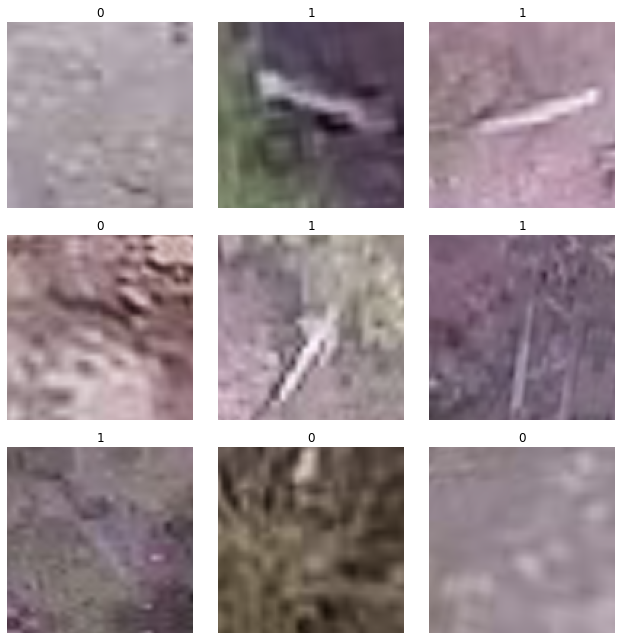

In [ ]:
data.show_batch(rows=3, figsize=(9,9))

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

In [ ]:
learn.fit_one_cycle(2,1e-02)

epoch,train_loss,valid_loss,accuracy,time
0,0.078962,0.080740,0.954286,01:26
1,0.014732,0.005305,1.000000,01:27


In [ ]:
predictions, *_ = learn.get_preds(DatasetType.Test)

In [ ]:
labels = np.argmax(predictions, 1)

In [ ]:

sub_df = pd.DataFrame({
    'Id': test_csv.id,
    'has_cactus':labels
})
sub_df.to_csv('submission13.csv', index=False)

In [ ]:
sub_df.head()

,Id,has_cactus
0,000940378805c44108d287872b2f04ce.jpg,1
1,0017242f54ececa4512b4d7937d1e21e.jpg,1
2,001ee6d8564003107853118ab87df407.jpg,0
3,002e175c3c1e060769475f52182583d0.jpg,0
4,0036e44a7e8f7218e9bc7bf8137e4943.jpg,1
